In [1]:
%run CPL_Library.ipynb # Running the entire library in one line because 
                        # importing does not work with JupyterLab


## Numerical Integration 
#### 1. Mid-point method
#### 2. Trapezoidal method 
#### 3. Simpson's method
#### 4. Monte Carlo Integration

# Question 1

In [6]:
def f1(x):
    return math.sqrt(1+1/x)

eps=10**-8
a=1
b=4

MP=[]
TR=[]
SMP=[]

N1=8

MP.append(int_mid_point(f1, a, b, N1))
TR.append(int_trapezoidal(f1, a, b, N1))
SMP.append(int_simpson(f1, a, b, N1))

N2=16

MP.append(int_mid_point(f1, a, b, N2))
TR.append(int_trapezoidal(f1, a, b, N2))
SMP.append(int_simpson(f1, a, b, N2))

N3=24

MP.append(int_mid_point(f1, a, b, N3))
TR.append(int_trapezoidal(f1, a, b, N3))
SMP.append(int_simpson(f1, a, b, N3))

# =========================================================================================
# Calculating the actual value of integral

# feed here maximum of second derivative of function for Mid-point
fn_mp=0.619 # for f1
# feed here maximum of second derivative of function for trapezoidal
fn_t=0.619 # for f1
# feed here maximum of fourth derivative of function for simpson
fn_s=6.016 # for f1

N_mp, N_t, N_s = calculate_N(fn_mp, fn_t, fn_s)

MP.append(int_mid_point(f1, a, b, N_mp))
TR.append(int_trapezoidal(f1, a, b, N_t))
SMP.append(int_simpson(f1, a, b, N_s))
# =========================================================================================

print ("{:<25} {:<25} {:<25} {:<25}".format('No. of iterations', 'Mid-point', 'trapezoidal', 'Simpson'))
print()
print ("{:<25} {:<25} {:<25} {:<25}".format(N1, MP[0], TR[0], SMP[0]))
print ("{:<25} {:<25} {:<25} {:<25}".format(N2, MP[1], TR[1], SMP[1]))
print ("{:<25} {:<25} {:<25} {:<25}".format(N3, MP[2], TR[2], SMP[2]))
print()
print ("{:<25} {:<25} {:<25} {:<25}".format('Actual value', MP[3], TR[3], SMP[3]))


No. of iterations         Mid-point                 trapezoidal               Simpson                  

8                         3.6183138593298727        3.623956949398562         3.6203301434402904       
16                        3.619709761707181         3.6211354043642174        3.6201948893527693       
24                        3.619972785533525         3.620607687124767         3.620186449815972        

Actual value              3.6201841052416963        3.6201844561676655        3.620184367459324        


# Question 2

In [3]:
def f2(x):
    return x*math.sqrt(1+x)

eps=10**-4
a=0
b=1

# feed here maximum of second derivative of function for Mid-point
fn_mp=1 # for f2
# feed here maximum of second derivative of function for trapezoidal
fn_t=1 # for f2
# feed here maximum of fourth derivative of function for simpson
fn_s=1.5 # for f2

N_mp, N_t, N_s = calculate_N(fn_mp, fn_t, fn_s, eps)

MP=(int_mid_point(f2, a, b, N_mp))
TR=(int_trapezoidal(f2, a, b, N_t))
SMP=(int_simpson(f2, a, b, N_s))

print("For mid-point, N = " + str(N_mp) + " and integral = " + str(MP))
print("For trapezoidal, N = " + str(N_t) + " and integral = " + str(TR))
print("For simpson, N = " + str(N_s) + " and integral = " + str(SMP))


For mid-point, N = 20 and integral = 0.643710311759088
For trapezoidal, N = 28 and integral = 0.6438718899363646
For simpson, N = 4 and integral = 0.6438016157592887


# Question 3

It will take around 10-15 seconds
The value of the integral in the last iteration is = 3.141565779302004


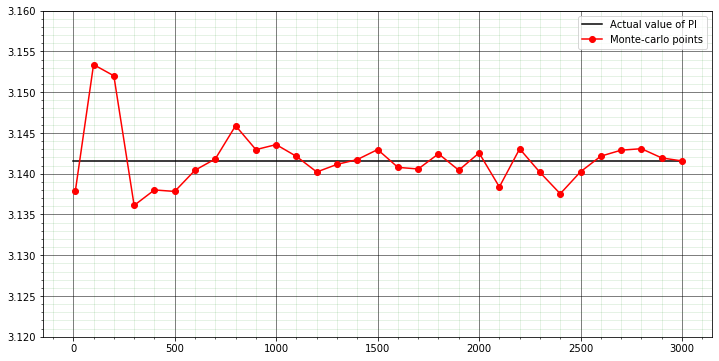

In [4]:
def f3(x):
    return 4/(1+x**2)

print("It will take around 10-15 seconds")
plt.figure(figsize=(12,6))

a=0
b=1
N=10

NN=[]
MC=[]
NN.append(N)
MC.append(int_monte_carlo(f3,pdf,a,b,N))


x=[0,3000]
y=[math.pi,math.pi]
plt.plot(x,y,'k-', label='Actual value of PI')

for N in range(100, 3001, 100):
    NN.append(N)
    MC.append(int_monte_carlo(f3,pdf,a,b,N))
plt.plot(NN,MC,'r-o', label='Monte-carlo points')
print("The value of the integral in the last iteration is = " + str(MC[-1]))


# One could also use N=10 and proceed with a step size of 10 as instructed
# in question 3 but that will not give any significant improvement. Hence 
# I made the plot with step size=100 upto 5000 taking a total of 50 points
# If one still wishes to use step-size = 10 and work for 100 points, then
# the following code should be used
'''
x=[0,500]
y=[math.pi,math.pi]
plt.plot(x,y,'r-', label='Actual value of PI')

for N in range(10, 501, 10):
    NN.append(N)
    MC.append(int_monte_carlo(f3,pdf,a,b,N))
plt.plot(NN,MC,'b-o', label='Monte-carlo points')
print("The value of the integral in the last iteration is = " + str(MC[-1]))
'''

plt.grid(b=True, which='major', color='k', alpha=1, ls='-', lw=0.5)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='g', alpha=0.2, ls='-', lw=0.5)
plt.ylim(3.12,3.16)
plt.legend()
plt.show()


# Question 4

In [9]:
print("linear mass density = T = x^2")
print("Centre of mass = integral(xT) dx / integral(T) dx")

def f4(x):
    return x**3

def f5(x):
    return x**2

eps=10**-6
a=0
b=2

# feed here maximum of second derivative of function for Mid-point
f4_mp=12 # for f4
# feed here maximum of second derivative of function for trapezoidal
f4_t=12 # for f4
# feed here maximum of fourth derivative of function for simpson
f4_s=0 # for f4

N_mp, N_t, N_s = calculate_N(f4_mp, f4_t, f4_s, eps)

MP1=(int_mid_point(f4, a, b, N_mp))
TR1=(int_trapezoidal(f4, a, b, N_t))
SMP1=(int_simpson(f4, a, b, N_s))

# feed here maximum of second derivative of function for Mid-point
f5_mp=2 # for f5
# feed here maximum of second derivative of function for trapezoidal
f5_t=2 # for f5
# feed here maximum of fourth derivative of function for simpson
f5_s=0 # for f5

N_mp, N_t, N_s = calculate_N(f5_mp, f5_t, f5_s, eps)

MP2=(int_mid_point(f5, a, b, N_mp))
TR2=(int_trapezoidal(f5, a, b, N_t))
SMP2=(int_simpson(f5, a, b, N_s))

print("\nUsing mid-point, the centre of mass = " + str(MP1/MP2))
print("\nUsing trapezoidal, the centre of mass = " + str(TR1/TR2))
print("\nUsing simpson, the centre of mass = " + str(SMP1/SMP2))


linear mass density = T = x^2
Centre of mass = integral(xT) dx / integral(T) dx

Using mid-point, the centre of mass = 1.5000003756849742

Using trapezoidal, the centre of mass = 1.4999996243736406

Using simpson, the centre of mass = 1.5
